# Programming Exercise 2: Logistic Regression

## Introduction
In this exercise, you will implement logistic regression and apply it to two different datasets. Before starting on the programming exercise, we strongly
recommend watching the video lectures and completing the review questions for the associated topics.

To get started with the exercise, you will need to download the starter code and unzip its contents to the directory where you wish to complete the exercise. 

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fmin_bfgs, minimize

%matplotlib inline

## 1 Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions
decision.

Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams. 

### 1.1 Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. The code will load the
data and display it on a 2-dimensional plot by calling the function plotData. You will now complete the code in plotData so that it displays a figure like Figure 1, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

To help you get more familiar with plotting, we have left plotData empty so you can try to implement it yourself. However, this is an optional (ungraded) exercise. We also provide our implementation below so you can copy it or refer to it.

In [2]:
# read in the data
data = np.loadtxt('ex2data1.txt', delimiter=',')
data = np.asmatrix(data)
X, y = data[:,:2], data[:,2]
m = len(y)

In [3]:
def plotData(Xcol, ycol):
    
    X = np.asarray(Xcol)
    y = np.asarray(np.asarray(ycol)).flatten()
    # get indices of 1 and 0 y values
    pos = y == 1
    neg = y == 0
    
    # plot positive (i.e., accepted) points
    plt.plot(X[pos,0], X[pos,1], '+', color='k', ms=7,
             mew=2, label=r'Admitted')
    
    # plot negative (i.e., not accepted) points
    plt.plot(X[neg,0], X[neg,1], 'o', color='y', ms=7,
            label=r'Not Admitted')

    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

    plt.legend(loc='lower left')

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



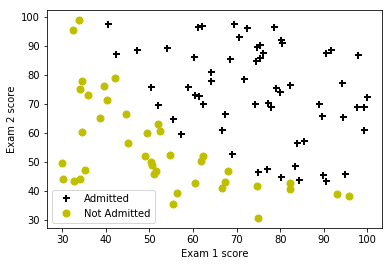

In [4]:
# ==================== Part 1: Plotting ====================
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.

print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n');

fig = plt.figure()

plotData(X, y);

### 1.2 Implementation
#### 1.2.1 Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:
$$h_{\theta}(x) = g(\theta^Tx);$$
where function g is the sigmoid function. The sigmoid function is defined as:
$$g(z)=\frac{1}{1+e^{-z}}$$

Your first step is to implement this function in sigmoid.m so it can be called by the rest of your program. When you are finished, try testing a few values by calling sigmoid(x). For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

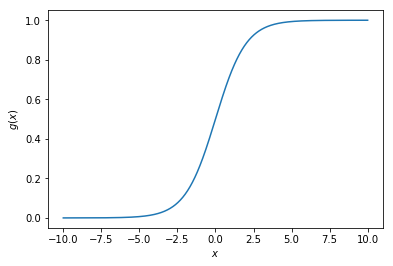

In [6]:
# test on a few values
xx = np.linspace(-10, 10, 1000)

# plot sigmoid function vs. x
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')

#### 1.2.2 Cost function and gradient
Now you will implement the cost function and gradient for logistic regression. Complete the code in costFunction.m to return the cost and gradient.
Recall that the cost function in logistic regression is 

$$J(\theta)=\frac{1}{m} \sum^{m}_{i=1}[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log (1-h_\theta(x^{(i)}))], $$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for j = 0, 1, ..., n) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j$$

Note that while this gradient looks identical to the linear regression gra-
dient, the formula is actually dierent because linear and logistic regression
have dierent denitions of h(x).
Once you are done, ex2.m will call your costFunction using the initial
parameters of . You should see that the cost is about 0.693.

In [7]:
# Take the following parameters and return the cost and gradient
# theta = 1 X m, X = n X m, and y = 1 X n (m = no. of feature and n = no. of sample)
# cost = R
def cost_func(theta, X, y):
    theta = np.matrix(theta).T
    with np.errstate(divide='ignore'):
        m = len(y)  
        htheta = sigmoid(np.matmul(X, theta))

        # use auxiliary cost function
        J = - 1 / m * (np.matmul(y.T, np.log(htheta)) + np.matmul((1-y).T, np.log(1-htheta)))
        return J

# Take the following parameters and return the cost and gradient
# theta = 1 X m, X = n X m, and y = 1 X n (m = no. of feature and n = no. of sample)
# grad = 1 X m
def gradient_func(theta, X, y):
    theta = np.matrix(theta).T
    with np.errstate(divide='ignore'):
        m = len(y)  
        htheta = sigmoid(np.matmul(X, theta))
        
        # use auxiliary gradient function
        grad = np.matmul(X.T, (htheta - y)) / m
        grad = grad.A1
        return grad

# Take the following parameters and return the cost and gradient
# theta = m X 1, X = n X m, and y = n X 1 (m = no. of feature and n = no. of sample)
# cost = const and gradient = m X 1
def costFunction(theta, X, y):
    with np.errstate(divide='ignore'):
        m = len(y)  
        htheta = sigmoid(np.matmul(X, theta))

        # use auxiliary cost function
        J = - 1 / m * (np.matmul(y.T, np.log(htheta)) + np.matmul((1-y).T, np.log(1-htheta)))

        # use auxiliary gradient function
        grad = np.matmul(X.T, (htheta - y)) / m
    
        return J, grad

In [8]:
# setup the data matrix appropriately
m, n = X.shape

# add intercept term to X
X = np.hstack((np.ones((m, 1)), X))

# initalize theta
initial_theta = np.zeros((n+1, 1)) 

# compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): %f\n' % cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros): \n');
print(grad);
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

# Compute and display cost and gradient with non-zero theta
test_theta = np.matrix([-24,0.2,0.2]).T; 
[cost, grad] = costFunction(test_theta, X, y);

print('\nCost at test theta: %f\n' % cost);
print('Expected cost (approx): 0.218\n');
print('Gradient at test theta: \n');
print(grad);
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


Cost at test theta: 0.218330

Expected cost (approx): 0.218

Gradient at test theta: 

[[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647



#### 1.2.3 Learning parameters using scipy optimization.minimize

In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradent descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use a Python scipy function called Optimization.minimize.

Optimization.minimize is an optimization solver that finds the minimum of an unconstrained2 function. For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$. 

Concretely, you are going to use Optimization.minimize to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to fminunc the following inputs:
* The initial values of the parameters we are trying to optimize.
* A function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset (X, y)

We already have code written to call fminunc with the correct arguments.

In [9]:
def plotDecisionBoundary(theta, X, y):
    
    plotData(X[:,1:], y)
    
    # get min and max values
    xx = np.array([np.min(X[:,1]), np.max(X[:,1])])
    
    # get boundary of separation
    yy = (- theta[0] - theta[2] * xx) / theta[1]
    
    plt.plot(xx, yy, lw=1.5)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
Cost at theta found by fminunc: 0.203498

Expected cost (approx): 0.203

theta: 

[[-25.16133284]
 [  0.2062317 ]
 [  0.2014716 ]]
Expected theta (approx):

 -25.161
 0.206
 0.201



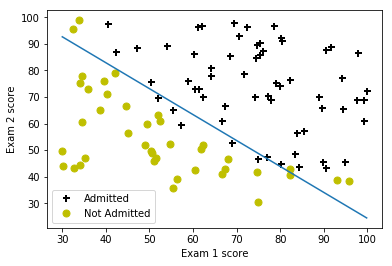

In [10]:
# ============= Part 3: Optimizing using fminunc  =============
#  In this exercise, you will use a built-in function (fminunc) to find the
#  optimal parameters theta.

#  Run minimize to obtain the optimal theta
#  This function will return theta and the cost
t0 = np.zeros(n+1)
res = minimize(cost_func, t0, method='BFGS', jac=gradient_func, args=(X,y), options={'disp': True, 'maxiter':400})

# Print theta to screen
print('Cost at theta found by fminunc: %f\n' % res.fun);
print('Expected cost (approx): 0.203\n');
print('theta: \n');
print(np.matrix(res.x).T);
print('Expected theta (approx):\n');
print(' -25.161\n 0.206\n 0.201\n');

# Plot Boundary
plotDecisionBoundary(res.x, X, y);

In this code snippet, we first defined the options to be used with optimization.minimize. Specifically, we set method to BFGS, which tells minimize that we use BFGS algorithm. This allows minimize to use the gradient when minimizing the function. Furthermore, we set the maxiter option to 400, so that optimize will run for at most 400 steps before it terminates.

 If you have completed the costFunction correctly, optimize will converge on the right optimization parameters and return the final values of the cost and $\theta$. Notice that by using optimize, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by optimize: you only needed to provide a function calculating the cost and the gradient.


Once optimize completes, optimal parameters of $\theta$ can be found in res.x and cost can be found in res.fun.

This final $\theta$ value will then be used to plot the decision boundary on the training data, resulting in a figure similar to Figure 2. We also encourage you to look at the code in plotDecisionBoundary.m to see how to plot such a boundary using the $\theta$ values.

#### 1.2.4 Evaluating logistic regression
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score
of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in predict.m. The predict function will produce "1" or "0" predictions given a dataset and a learned parameter vector $\theta$.

After you have completed the code in predict.m, the script will proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [11]:
def predict(theta, X):
    p = sigmoid(np.matmul(X, theta)) > 0.5
    
    return p

In [12]:
# ============== Part 4: Predict and Accuracies ==============
#  After learning the parameters, you'll like to use it to predict the outcomes
#  on unseen data. In this part, you will use the logistic regression model
#  to predict the probability that a student with score 45 on exam 1 and 
#  score 85 on exam 2 will be admitted.
#
#  Furthermore, you will compute the training and test set accuracies of 
#  our model.
#
#  Your task is to complete the code in predict.m

#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 

theta = np.matrix(res.x).T
prob = sigmoid(np.matmul(np.array([1, 45, 85]), theta))
print ('For a student with scores 45 and 85, we predict an admission probability of %f\n' % prob);
print('Expected value: 0.775 +/- 0.002\n\n');

# Compute accuracy on our training set
p = predict(theta, X);

print('Train Accuracy: %f\n'% (np.mean((p == y)) * 100));
print('Expected accuracy (approx): 89.0\n');
print('\n');

For a student with scores 45 and 85, we predict an admission probability of 0.776291

Expected value: 0.775 +/- 0.002


Train Accuracy: 89.000000

Expected accuracy (approx): 89.0





## 2 Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1 Visualizing the data
Similar to the previous parts of this exercise, plotData is used to generate a figure like Figure 3, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

Figure 3 shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

In [13]:
def plotData_2(Xcol, ycol):
    
    X = np.asarray(Xcol)
    y = np.asarray(np.asarray(ycol)).flatten()
    # get indices of 1 and 0 y values
    pos = y == 1
    neg = y == 0
    
    # plot positive (i.e., accepted) points
    plt.plot(X[pos,0], X[pos,1], '+', color='k', ms=7,
             mew=2, label=r'y=1')
    
    # plot negative (i.e., not accepted) points
    plt.plot(X[neg,0], X[neg,1], 'o', color='y', ms=7,
            label=r'y=0')

    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

    plt.legend(loc='upper right')

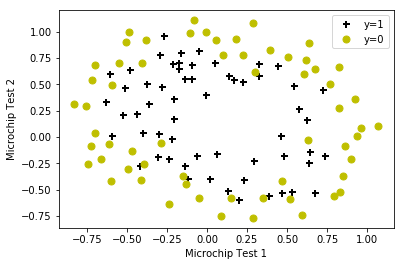

In [14]:
# read in the data
data = np.loadtxt('ex2data2.txt', delimiter=',')
data = np.asmatrix(data)
X, y = data[:,:2], data[:,2]
m = len(y)

plotData_2(X, y);

### 2.2 Feature mapping
One way to fit the data better is to create more features from each data point. In the provided function mapFeature.m, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$ y = \begin{bmatrix}
           1 \\
           x_{1} \\
           x_{2} \\
           x_{1}^2 \\
           x_1x_2 \\
           x_2^2 \\
           x_1^3 \\
           \vdots \\
           x_1x_2^5 \\
           x_2^6
         \end{bmatrix}$$
         
         
As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overtting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [15]:
def mapFeature(X1, X2):
# MAPFEATURE Feature mapping function to polynomial features
#
#   MAPFEATURE(X1, X2) maps the two input features
#   to quadratic features used in the regularization exercise.
#
#   Returns a new feature array with more features, comprising of 
#   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
#
#   Inputs X1, X2 must be the same size
#
    degrees = 6
    m = len(np.atleast_1d(X1))
    X = np.ones((m, 1))
    for ii in range(1, degrees+1):
        for jj in range(0,ii+1):
            X = np.hstack((X, (np.multiply(np.power(X1,ii-jj) ,np.power(X2, jj))).reshape(m,1)))
    
    return X

### 2.3 Cost function and gradient
Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code in costFunctionReg to return the cost and gradient. Recall that the regularized cost function in logistic regression is

$$ J(\theta)=\frac{1}{m}\sum^{m}_{i=1}[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum^{n}_{j=1}\theta^2_j $$

Note that you should not regularize the parameter $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ 
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum\limits^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j & & \mbox{ for $j=0$} \\
\frac{\partial J(\theta)}{\partial \theta_j}=(\frac{1}{m}\sum\limits^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j) + \frac{\lambda}{m}\theta_j & & \mbox{ for $j>=1$}
\end{align}
$$ 

Once you are done, ex2 reg.m will call your costFunctionReg function using the initial value of $\theta$ (initialized to all zeros). You should see that the cost is about 0.693.


In [16]:
# Take the following parameters and return the cost and gradient
# theta = 1 X m, X = n X m, and y = 1 X n (m = no. of feature and n = no. of sample)
# cost = R
def cost_func_reg(theta, X, y, l):
    theta = np.asarray(np.matrix(theta).T)
    mask_array = np.ones((len(theta), 1))
    mask_array[0,0] = 0.0
    
    with np.errstate(divide='ignore'):
        m = len(y)  
        htheta = sigmoid(np.matmul(X, theta))
        # use auxiliary gradient function
        # use auxiliary cost function
        J = - 1 / m * (np.matmul(y.T, np.log(htheta)) + np.matmul((1-y).T, np.log(1-htheta))) \
                + l/2/m*np.sum(np.multiply(mask_array, theta)**2)
        return J

# Take the following parameters and return the cost and gradient
# theta = 1 X m, X = n X m, and y = 1 X n (m = no. of feature and n = no. of sample)
# grad = 1 X m
def gradient_func_reg(theta, X, y, l):
    theta = np.asarray(np.matrix(theta).T)
    mask_array = np.ones((len(theta), 1))
    mask_array[0, 0] = 0.0
    
    with np.errstate(divide='ignore'):
        m = len(y)  
        htheta = sigmoid(np.matmul(X, theta))
        
        grad = np.matmul(X.T, (htheta - y)) / m + np.multiply(mask_array, theta) * l / m
        grad = grad.A1
        return grad

# Take the following parameters and return the cost and gradient
# theta = m X 1, X = n X m, and y = n X 1 (m = no. of feature and n = no. of sample)
# cost = const and gradient = m X 1
def costFunctionReg(theta, X, y, l):
    mask_array = np.ones((len(theta), 1))
    mask_array[0,0] = 0.0
    with np.errstate(divide='ignore'):
        m = len(y)  
        htheta = sigmoid(np.matmul(X, theta))
        # use auxiliary cost function
        J = - 1 / m * (np.matmul(y.T, np.log(htheta)) + np.matmul((1-y).T, np.log(1-htheta))) \
                + l/2/m*np.sum(np.multiply(mask_array, theta)**2)

        # use auxiliary gradient function
        grad = np.matmul(X.T, (htheta - y)) / m + np.multiply(mask_array, theta) * l / m
    
        return J, grad

In [17]:
# =========== Part 1: Regularized Logistic Regression ============
#  In this part, you are given a dataset with data points that are not
#  linearly separable. However, you would still like to use logistic
#  regression to classify the data points.
#
#  To do so, you introduce more features to use -- in particular, you add
#  polynomial features to our data matrix (similar to polynomial
#  regression).
#

# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = mapFeature(X[:,0], X[:,1]);
m, n = X.shape

# Initialize fitting parameters
initial_theta = np.zeros((n, 1));

# Set regularization parameter lambda to 1
l = 1;

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, l);

print('Cost at initial theta (zeros): %f\n' % cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros) - first five values only:\n');
print(grad[0:5]);
print('Expected gradients (approx) - first five values only:\n');
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((n,1));
cost, grad = costFunctionReg(test_theta, X, y, 10);

print('\nCost at test theta (with lambda = 10): %f\n' % cost);
print('Expected cost (approx): 3.16\n');
print('Gradient at test theta - first five values only:\n');
print(grad[0:5]);
print('Expected gradients (approx) - first five values only:\n');
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');


Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Cost at test theta (with lambda = 10): 3.164509

Expected cost (approx): 3.16

Gradient at test theta - first five values only:

[[ 0.34604507]
 [ 0.16135192]
 [ 0.19479576]
 [ 0.22686278]
 [ 0.09218568]]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



#### 2.3.1 Learning parameters using fminunc
Similar to the previous parts, you will use optimize to learn the optimal parameters $\theta$. If you have completed the cost and gradient for regularized logistic regression costFunctionReg correctly, you should be able to step through the next part to learn the parameters $\theta$ using optimize.

In [18]:
# ============= Part 2: Regularization and Accuracies =============
#  Optional Exercise:
#  In this part, you will get to try different values of lambda and
#  see how regularization affects the decision coundart
#
#  Try the following values of lambda (0, 1, 10, 100).
#
#  How does the decision boundary change when you vary lambda? How does
#  the training set accuracy vary?
#

# Initialize fitting parameters
m, n = X.shape
initial_theta_reg = np.zeros((n, 1));

# Set regularization parameter lambda to 1 (you should vary this)
l = 1;

# Optimize
res = minimize(cost_func_reg, initial_theta_reg, method='BFGS', jac=gradient_func_reg, args=(X,y, l), options={'disp': True, 'maxiter':400})

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


### 2.4 Plotting the decision boundary
To help you visualize the model learned by this classifier, we have provided the function plotDecisionBoundary2 which plots the (non-linear) decision boundary that separates the positive and negative examples. In plotDecisionBoundary2, we plot the non-linear decision boundary by computing the classifier's predictions on an evenly spaced grid and then and drew a contour plot of where the predictions change from y = 0 to y = 1. 

After learning the parameters $\theta$, the next step in ex reg.m will plot a decision boundary similar to Figure 4.

In [19]:
def plotDecisionBoundary2(theta, X, y, l):
    # plot the data
    plotData_2(X[:,1:3], y)

    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((len(u), len(v)))
    for ii in range(len(u)):
        for jj in range(len(v)):
            z[ii,jj] = np.dot(mapFeature(u[ii], v[jj]), theta)

    plt.contour(u, v, z.T, [0,0], labels='Decision Boundary', colors='b', corner_mask='legacy')
    plt.title('lambda = %g' % l)

Train Accuracy: 83.050847

Expected accuracy (with lambda = 1): 83.1 (approx)



/home/administrator/environments/python3/lib/python3.5/site-packages/matplotlib/contour.py:1184: UserWarning: Contour levels are not increasing
  warnings.warn("Contour levels are not increasing")
/home/administrator/environments/python3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The corner_mask='legacy' attribute was deprecated in version 1.5. Use corner_mask=False or True instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


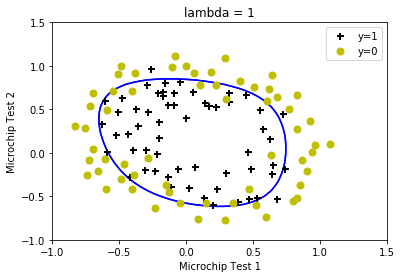

In [20]:
# Plot Boundary
plotDecisionBoundary2(res.x, X, y, l);

# Compute accuracy on our training set
p = predict(np.matrix(res.x).T, X);

print('Train Accuracy: %f\n' % (np.mean((p == y)) * 100));
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n');


### 2.5 Optional (ungraded) exercises

In this part of the exercise, you will get to try out different regularization parameters for the dataset to understand how regularization prevents overfitting. Notice the changes in the decision boundary as you vary $\lambda$. With a small $\lambda$, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data (Figure 5). This is not a good decision boundary: for example, it predicts
that a point at x = (-0.25, 1.5) is accepted (y = 1), which seems to be an incorrect decision given the training set.


With a larger $\lambda$, you should see a plot that shows an simpler decision boundary which still separates the positives and negatives fairly well. However, if $\lambda$ is set to too high a value, you will not get a good fit and the decision boundary will not follow the data so well, thus underfitting the data (Figure 6).

/home/administrator/environments/python3/lib/python3.5/site-packages/matplotlib/contour.py:1184: UserWarning: Contour levels are not increasing
  warnings.warn("Contour levels are not increasing")
/home/administrator/environments/python3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The corner_mask='legacy' attribute was deprecated in version 1.5. Use corner_mask=False or True instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


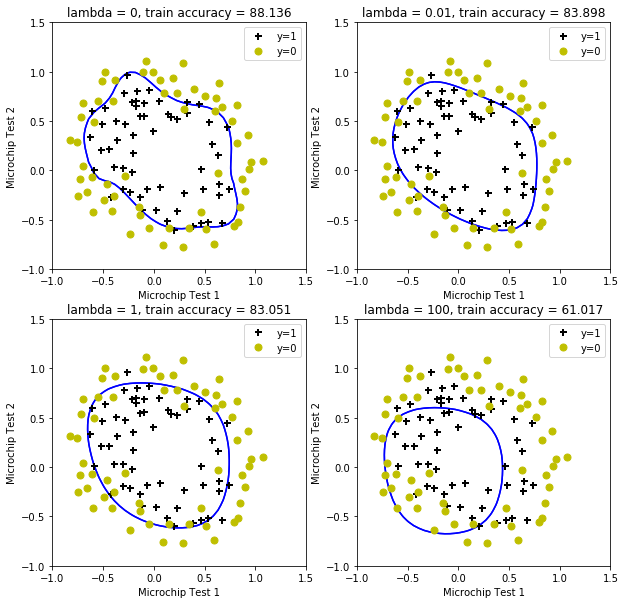

In [21]:
fig = plt.figure(figsize=(10,10))

lams = [0, 0.01, 1, 100]
for ct, lam in enumerate(lams):
    res = minimize(cost_func_reg, initial_theta_reg, method='BFGS', \
                   jac=gradient_func_reg, args=(X,y, lam), options={'disp': False, 'maxiter':400})
    
    theta_new_reg = np.matrix(res.x).T
    p = predict(theta_new_reg, X)
    plt.subplot(2,2,ct+1)
    
    plotDecisionBoundary2(theta_new_reg, X, y, lam)
    plt.title('lambda = %g, train accuracy = %3.3f' %(lam, np.mean(p==y)*100))